In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('nogales.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
df0.head()

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,30/01/2018,16:00,82,96,10.20,17.6,13.7,30,878.7,0.0,461.5
1,30/01/2018,17:00,83,103,10.91,21.5,17.8,25,878.6,0.0,640.2
2,30/01/2018,18:00,83,134,5.16,17.6,20.8,21,878.1,0.0,744.8
3,30/01/2018,19:00,3,358,4.18,15.7,22.8,18,877.2,0.0,777.3
4,30/01/2018,20:00,10,355,0.52,19.4,23.7,16,876.2,0.0,750.7


In [4]:
df=pd.DataFrame(df0)

In [5]:
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,82,96,10.20,17.6,13.7,30,878.7,0.0,461.5,2018-01-30 16:00:00
1,83,103,10.91,21.5,17.8,25,878.6,0.0,640.2,2018-01-30 17:00:00
2,83,134,5.16,17.6,20.8,21,878.1,0.0,744.8,2018-01-30 18:00:00
3,3,358,4.18,15.7,22.8,18,877.2,0.0,777.3,2018-01-30 19:00:00
4,10,355,0.52,19.4,23.7,16,876.2,0.0,750.7,2018-01-30 20:00:00


In [8]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.0,167.000000
mean,227.023952,257.880240,5.463832,13.247904,16.191018,28.970060,875.628743,0.0,191.667665
std,84.525533,80.571139,3.747458,7.468495,5.494091,12.034301,1.924888,0.0,276.195504
min,3.000000,71.000000,0.120000,3.700000,7.200000,9.000000,871.600000,0.0,0.000000
25%,202.000000,236.500000,2.580000,6.900000,11.350000,20.000000,874.350000,0.0,0.000000
50%,257.000000,284.000000,4.340000,10.800000,15.600000,27.000000,875.500000,0.0,0.000000
75%,284.500000,316.000000,7.355000,18.550000,21.250000,35.000000,877.000000,0.0,403.350000
max,353.000000,360.000000,14.890000,35.900000,25.800000,64.000000,880.400000,0.0,791.200000


In [9]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
7,3,360,7.14,17.5,24.9,14,874.2,0.0,249.7,2018-01-30 23:00:00
52,234,247,6.45,22.0,24.1,12,876.0,0.0,770.0,2018-02-01 20:00:00
53,228,250,9.87,23.8,24.8,12,875.4,0.0,657.3,2018-02-01 21:00:00
54,260,320,9.52,27.0,24.5,13,875.4,0.0,411.7,2018-02-01 22:00:00
125,334,360,6.59,21.3,24.2,14,874.1,0.0,652.5,2018-02-04 21:00:00
127,327,360,7.23,18.3,24.8,16,873.6,0.0,273.7,2018-02-04 23:00:00
149,267,304,14.08,28.0,24.7,19,871.8,0.0,657.5,2018-02-05 21:00:00
150,257,291,13.87,28.2,24.6,19,871.7,0.0,472.8,2018-02-05 22:00:00


In [10]:
df.mean()

DIRS      227.023952
DIRR      257.880240
VELS        5.463832
VELR       13.247904
TEMP       16.191018
HR         28.970060
PB        875.628743
PREC        0.000000
RADSOL    191.667665
dtype: float64

In [11]:
df.TEMP.mean()

16.19101796407185

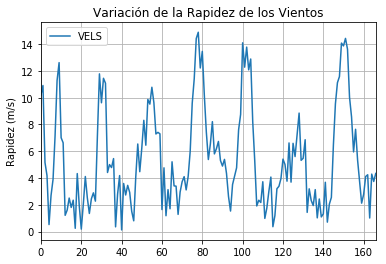

In [12]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

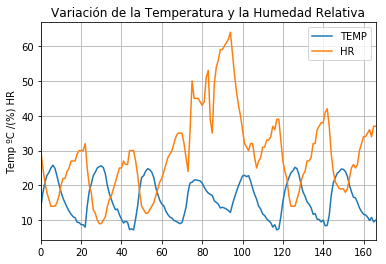

In [13]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

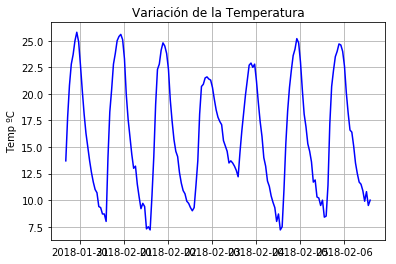

In [14]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

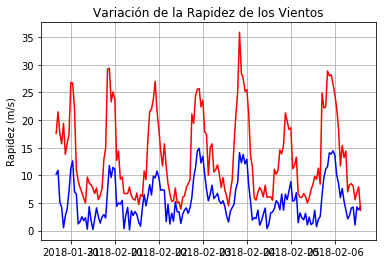

In [15]:
plt.plot_date(x=df.FECHA, y=df.VELS, fmt="b-")
plt.plot_date(x=df.FECHA, y=df.VELR, fmt="r-")
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

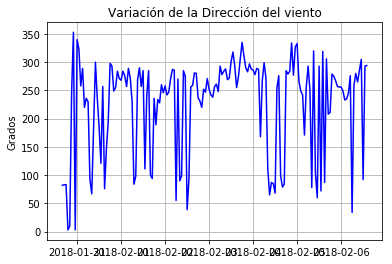

In [16]:
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="b-")
plt.title("Variación de la Dirección del viento")
plt.ylabel("Grados")
plt.grid(True)
plt.show()

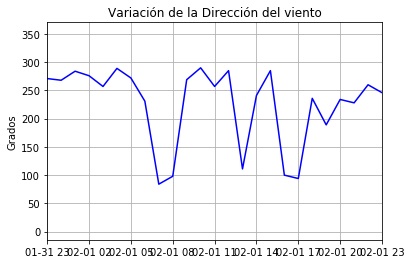

In [17]:
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="b-")
plt.xlim("2018-01-31 23:00:00","2018-02-01 23:00:00")
plt.title("Variación de la Dirección del viento")
plt.ylabel("Grados")
plt.grid(True)
plt.show()

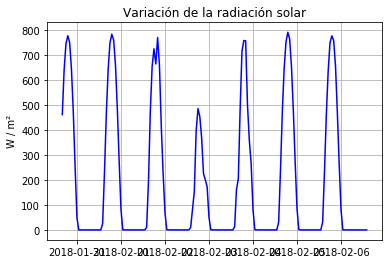

In [18]:
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="b-")
plt.title("Variación de la radiación solar")
plt.ylabel("W / m²")
plt.grid(True)
plt.show()

In [19]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.0,167.000000
mean,227.023952,257.880240,5.463832,13.247904,16.191018,28.970060,875.628743,0.0,191.667665
std,84.525533,80.571139,3.747458,7.468495,5.494091,12.034301,1.924888,0.0,276.195504
min,3.000000,71.000000,0.120000,3.700000,7.200000,9.000000,871.600000,0.0,0.000000
25%,202.000000,236.500000,2.580000,6.900000,11.350000,20.000000,874.350000,0.0,0.000000
50%,257.000000,284.000000,4.340000,10.800000,15.600000,27.000000,875.500000,0.0,0.000000
75%,284.500000,316.000000,7.355000,18.550000,21.250000,35.000000,877.000000,0.0,403.350000
max,353.000000,360.000000,14.890000,35.900000,25.800000,64.000000,880.400000,0.0,791.200000


In [20]:
df.TEMP.min()
df.TEMP.max()
dftm = df.TEMP.max()-df.TEMP.min()
dftm

18.600000000000001

In [21]:
df.TEMP.min()

7.2000000000000002

In [22]:
df.TEMP.max()

25.800000000000001